In [17]:
import pandas as pd

# Load the `data.xlsx` file into a dataframe
df1 = pd.read_excel('/content/CrestFactor_pred.xlsx')

# Print the dataframe
print(df1)

      C_0_1     C_0_2     C_0_3     C_0_4    C_15_1    C_15_2    C_15_3  \
0  1.066357  2.874667  1.236459  1.971151  3.337579  3.185427  3.283809   

     C_15_4    C_30_1    C_30_2  ...   WT_15_3   WT_15_4   WT_30_1   WT_30_2  \
0  3.297689  4.762658  4.964238  ...  5.635591  7.111106  7.226585  6.033146   

    WT_30_3   WT_30_4   WT_60_1   WT_60_2   WT_60_3   WT_60_4  
0  7.922114  6.122767  7.177179  7.865095  6.864126  7.865081  

[1 rows x 48 columns]


In [18]:
import pandas as pd

# Load the `data.xlsx` file into a dataframe
df2 = pd.read_excel('/content/CrestFactor_raw.xlsx')

# Print the dataframe
print(df2)

      C_0_1     C_0_2     C_0_3    C_0_4    C_15_1    C_15_2    C_15_3  \
0  3.487945  2.943096  3.155128  2.69641  3.641257  2.739866  3.328518   

     C_15_4    C_30_1    C_30_2  ...   WT_15_2  WT_15_3   WT_30_1   WT_30_2  \
0  2.885303  3.404592  2.763368  ...  2.616124  3.02474  3.920576  2.702156   

    WT_30_3   WT_30_4   WT_60_1   WT_60_2  WT_60_3  WT_60_4  
0  3.251352  3.214615  4.143718  2.750592   3.0404  3.41231  

[1 rows x 47 columns]


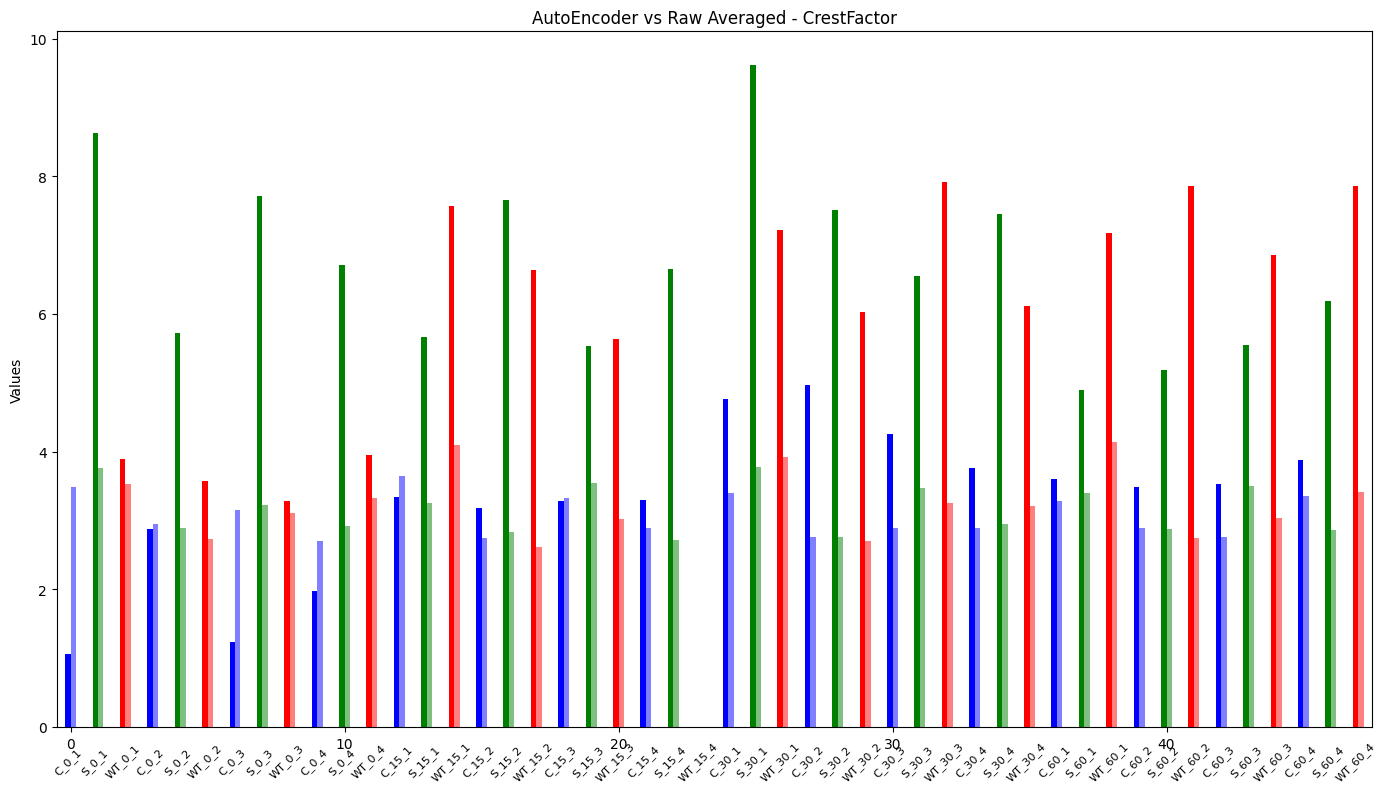

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df1' and 'df2' are your DataFrames
# Define metrics, times, reps, and other variables
metrics = ['C', 'S', 'WT']
times = [0, 15, 30, 60]
reps = [1, 2, 3, 4]
# Initialize plot with adjusted figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Define positions and widths for bars
x = np.arange(len(metrics) * len(times) * len(reps))
width = 0.2  # Increased width to create space between bars

colors = ['b', 'g', 'r']

# Loop through times, metrics, reps
i = 0
for t in times:
    for r in reps:
        for m in metrics:
            # Extract values
            col = f'{m}_{t}_{r}'
            try:
                pred = df1[col].values[0]
                raw = df2[col].values[0]
            except KeyError:
                pred = 0
                raw = 0

            # Plot values with adjusted positions and widths
            ax.bar(x[i] - width / 2, pred, width=width, color=colors[metrics.index(m)], label=f'{m}_{t}_{r} Predicted')
            ax.bar(x[i] + width / 2, raw, width=width, color=colors[metrics.index(m)], alpha=0.5, label=f'{m}_{t}_{r} Raw')

            # Place labels below bars horizontally
            ax.text(x[i] - width / 2, -0.5, f'{m}_{t}_{r}', ha='center', va='center', rotation=45, fontsize=8, color='black')

            i += 1

# Label plot
# ax.legend()
# Place legend below the plot in horizontal format

ax.set_ylabel('Values')
ax.set_xlabel('')
ax.set_title('AutoEncoder vs Raw Averaged - CrestFactor')

# Set x-axis limit to accommodate labels
ax.set_xlim(-0.5, len(x) - 0.5)

plt.tight_layout()
plt.show()


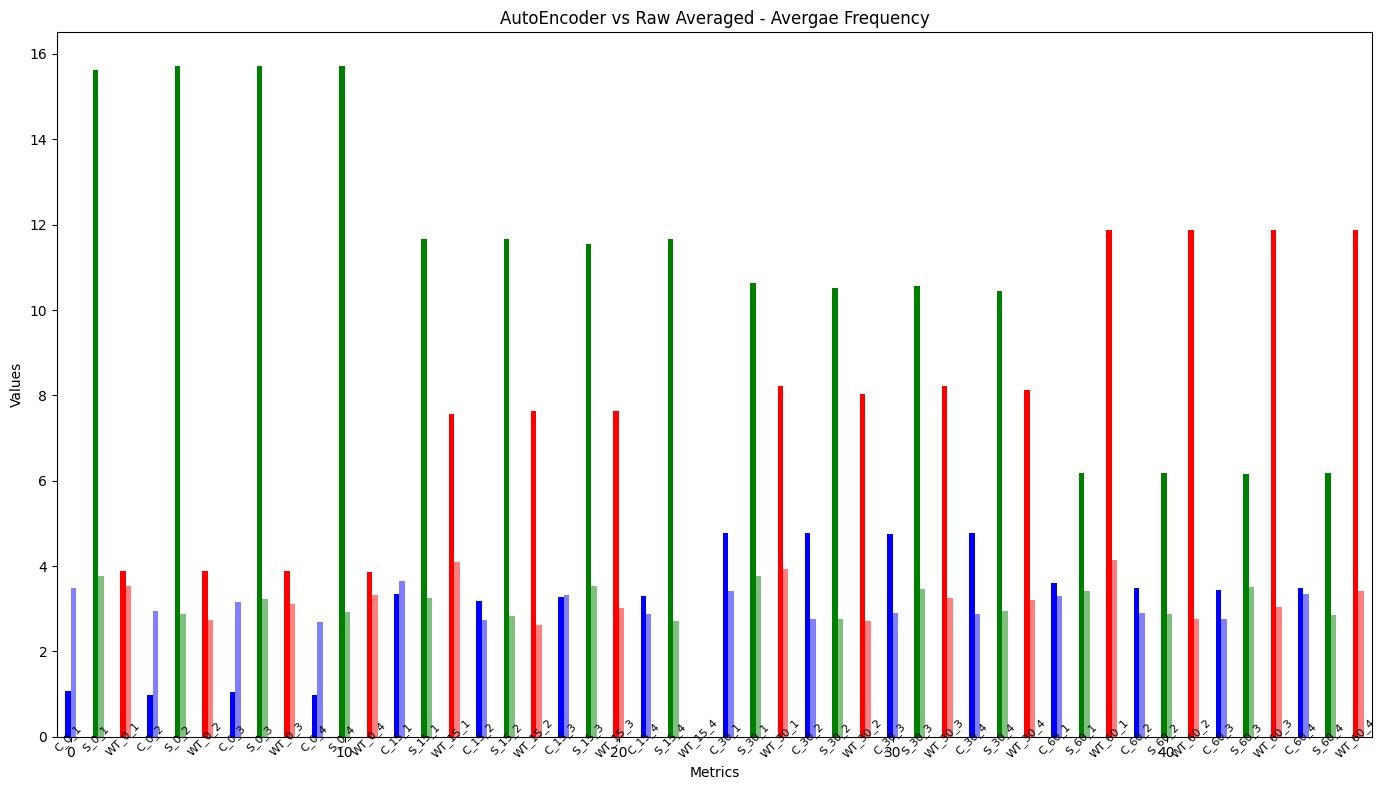

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df1' and 'df2' are your DataFrames
# Define metrics, times, reps, and other variables

# Initialize plot with adjusted figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Define positions and widths for bars
x = np.arange(len(metrics) * len(times) * len(reps))
width = 0.2  # Increased width to create space between bars

colors = ['b', 'g', 'r']
legend_labels = set()

# Loop through times, metrics, reps
i = 0
for t in times:
    for r in reps:
        for m in metrics:
            # Extract values
            col = f'{m}_{t}_{r}'
            try:
                pred = df1[col].values[0]
                raw = df2[col].values[0]
            except KeyError:
                pred = 0
                raw = 0

            # Plot values with adjusted positions and widths
            ax.bar(x[i] - width / 2, pred, width=width, color=colors[metrics.index(m)], label=f'{m}_{t}_{r} Predicted')
            ax.bar(x[i] + width / 2, raw, width=width, color=colors[metrics.index(m)], alpha=0.5, label=f'{m}_{t}_{r} Raw')

            # Place labels below bars horizontally
            ax.text(x[i] - width / 2, -0.05, f'{m}_{t}_{r}', ha='center', va='center', rotation=45, fontsize=8, color='black')

            # Add labels for C, S, and WT to the legend set
            if m in ['C', 'S', 'WT']:
                legend_labels.add(f'{m}_{t}_{r}')

            i += 1

# Label plot
ax.set_ylabel('Values')
ax.set_xlabel('Metrics')
ax.set_title('AutoEncoder vs Raw Averaged - Avergae Frequency')

# Set x-axis limit to accommodate labels
ax.set_xlim(-0.5, len(x) - 0.5)

# # Plot legend for C, S, and WT lines
# handles, labels = ax.get_legend_handles_labels()
# filtered_handles = [h for h, l in zip(handles, labels) if l.split()[0] in legend_labels]
# filtered_labels = [l for l in labels if l.split()[0] in legend_labels]
# ax.legend(filtered_handles, filtered_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)

plt.tight_layout()
plt.show()
